In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = "data"
FILE_PREFIX = "validation_loss_over_threshold_TRIAL_"

folder_contents = os.listdir(DATA_FOLDER)
data_files = list(filter(lambda x: x.startswith(FILE_PREFIX), folder_contents))
display(data_files)
NUM_SAMPLES = len(data_files)
# data_file_id = list(map(lambda x: int(x.removeprefix(FILE_PREFIX).split(".")[0]), data_files))

all_data = pd.DataFrame()
for data_file in data_files:
    df = pd.read_csv(os.path.join(DATA_FOLDER, data_file), index_col="Unnamed: 0")
    all_data = pd.concat([all_data, df], ignore_index=True)

['validation_loss_over_threshold_TRIAL_0.csv',
 'validation_loss_over_threshold_TRIAL_1.csv',
 'validation_loss_over_threshold_TRIAL_2.csv',
 'validation_loss_over_threshold_TRIAL_3.csv',
 'validation_loss_over_threshold_TRIAL_4.csv',
 'validation_loss_over_threshold_TRIAL_5.csv',
 'validation_loss_over_threshold_TRIAL_6.csv',
 'validation_loss_over_threshold_TRIAL_7.csv',
 'validation_loss_over_threshold_TRIAL_8.csv',
 'validation_loss_over_threshold_TRIAL_9.csv',
 'validation_loss_over_threshold_TRIAL_10.csv',
 'validation_loss_over_threshold_TRIAL_11.csv',
 'validation_loss_over_threshold_TRIAL_12.csv',
 'validation_loss_over_threshold_TRIAL_13.csv',
 'validation_loss_over_threshold_TRIAL_14.csv',
 'validation_loss_over_threshold_TRIAL_15.csv',
 'validation_loss_over_threshold_TRIAL_16.csv',
 'validation_loss_over_threshold_TRIAL_17.csv',
 'validation_loss_over_threshold_TRIAL_18.csv',
 'validation_loss_over_threshold_TRIAL_19.csv',
 'validation_loss_over_threshold_TRIAL_20.csv',
 '

In [3]:
display(all_data)

,Epoch,EWC Method,Aggregation Level,Threshold Value,Loss,Validation Loss
0,5,FISHER_MATRIX,NO_AGGREGATION,0.00,0.038927,0.060200
1,5,FISHER_MATRIX,NO_AGGREGATION,0.05,0.033768,0.051780
2,5,FISHER_MATRIX,NO_AGGREGATION,0.10,0.047382,0.065406
3,5,FISHER_MATRIX,NO_AGGREGATION,0.15,0.047247,0.062977
4,5,FISHER_MATRIX,NO_AGGREGATION,0.20,0.157199,0.168474
...,...,...,...,...,...,...
47245,25,RANDOM,CONV_FILTER,0.80,2.308615,2.308766
47246,25,RANDOM,CONV_FILTER,0.85,2.312016,2.311896
47247,25,RANDOM,CONV_FILTER,0.90,2.302263,2.302129
47248,25,RANDOM,CONV_FILTER,0.95,2.301962,2.301949


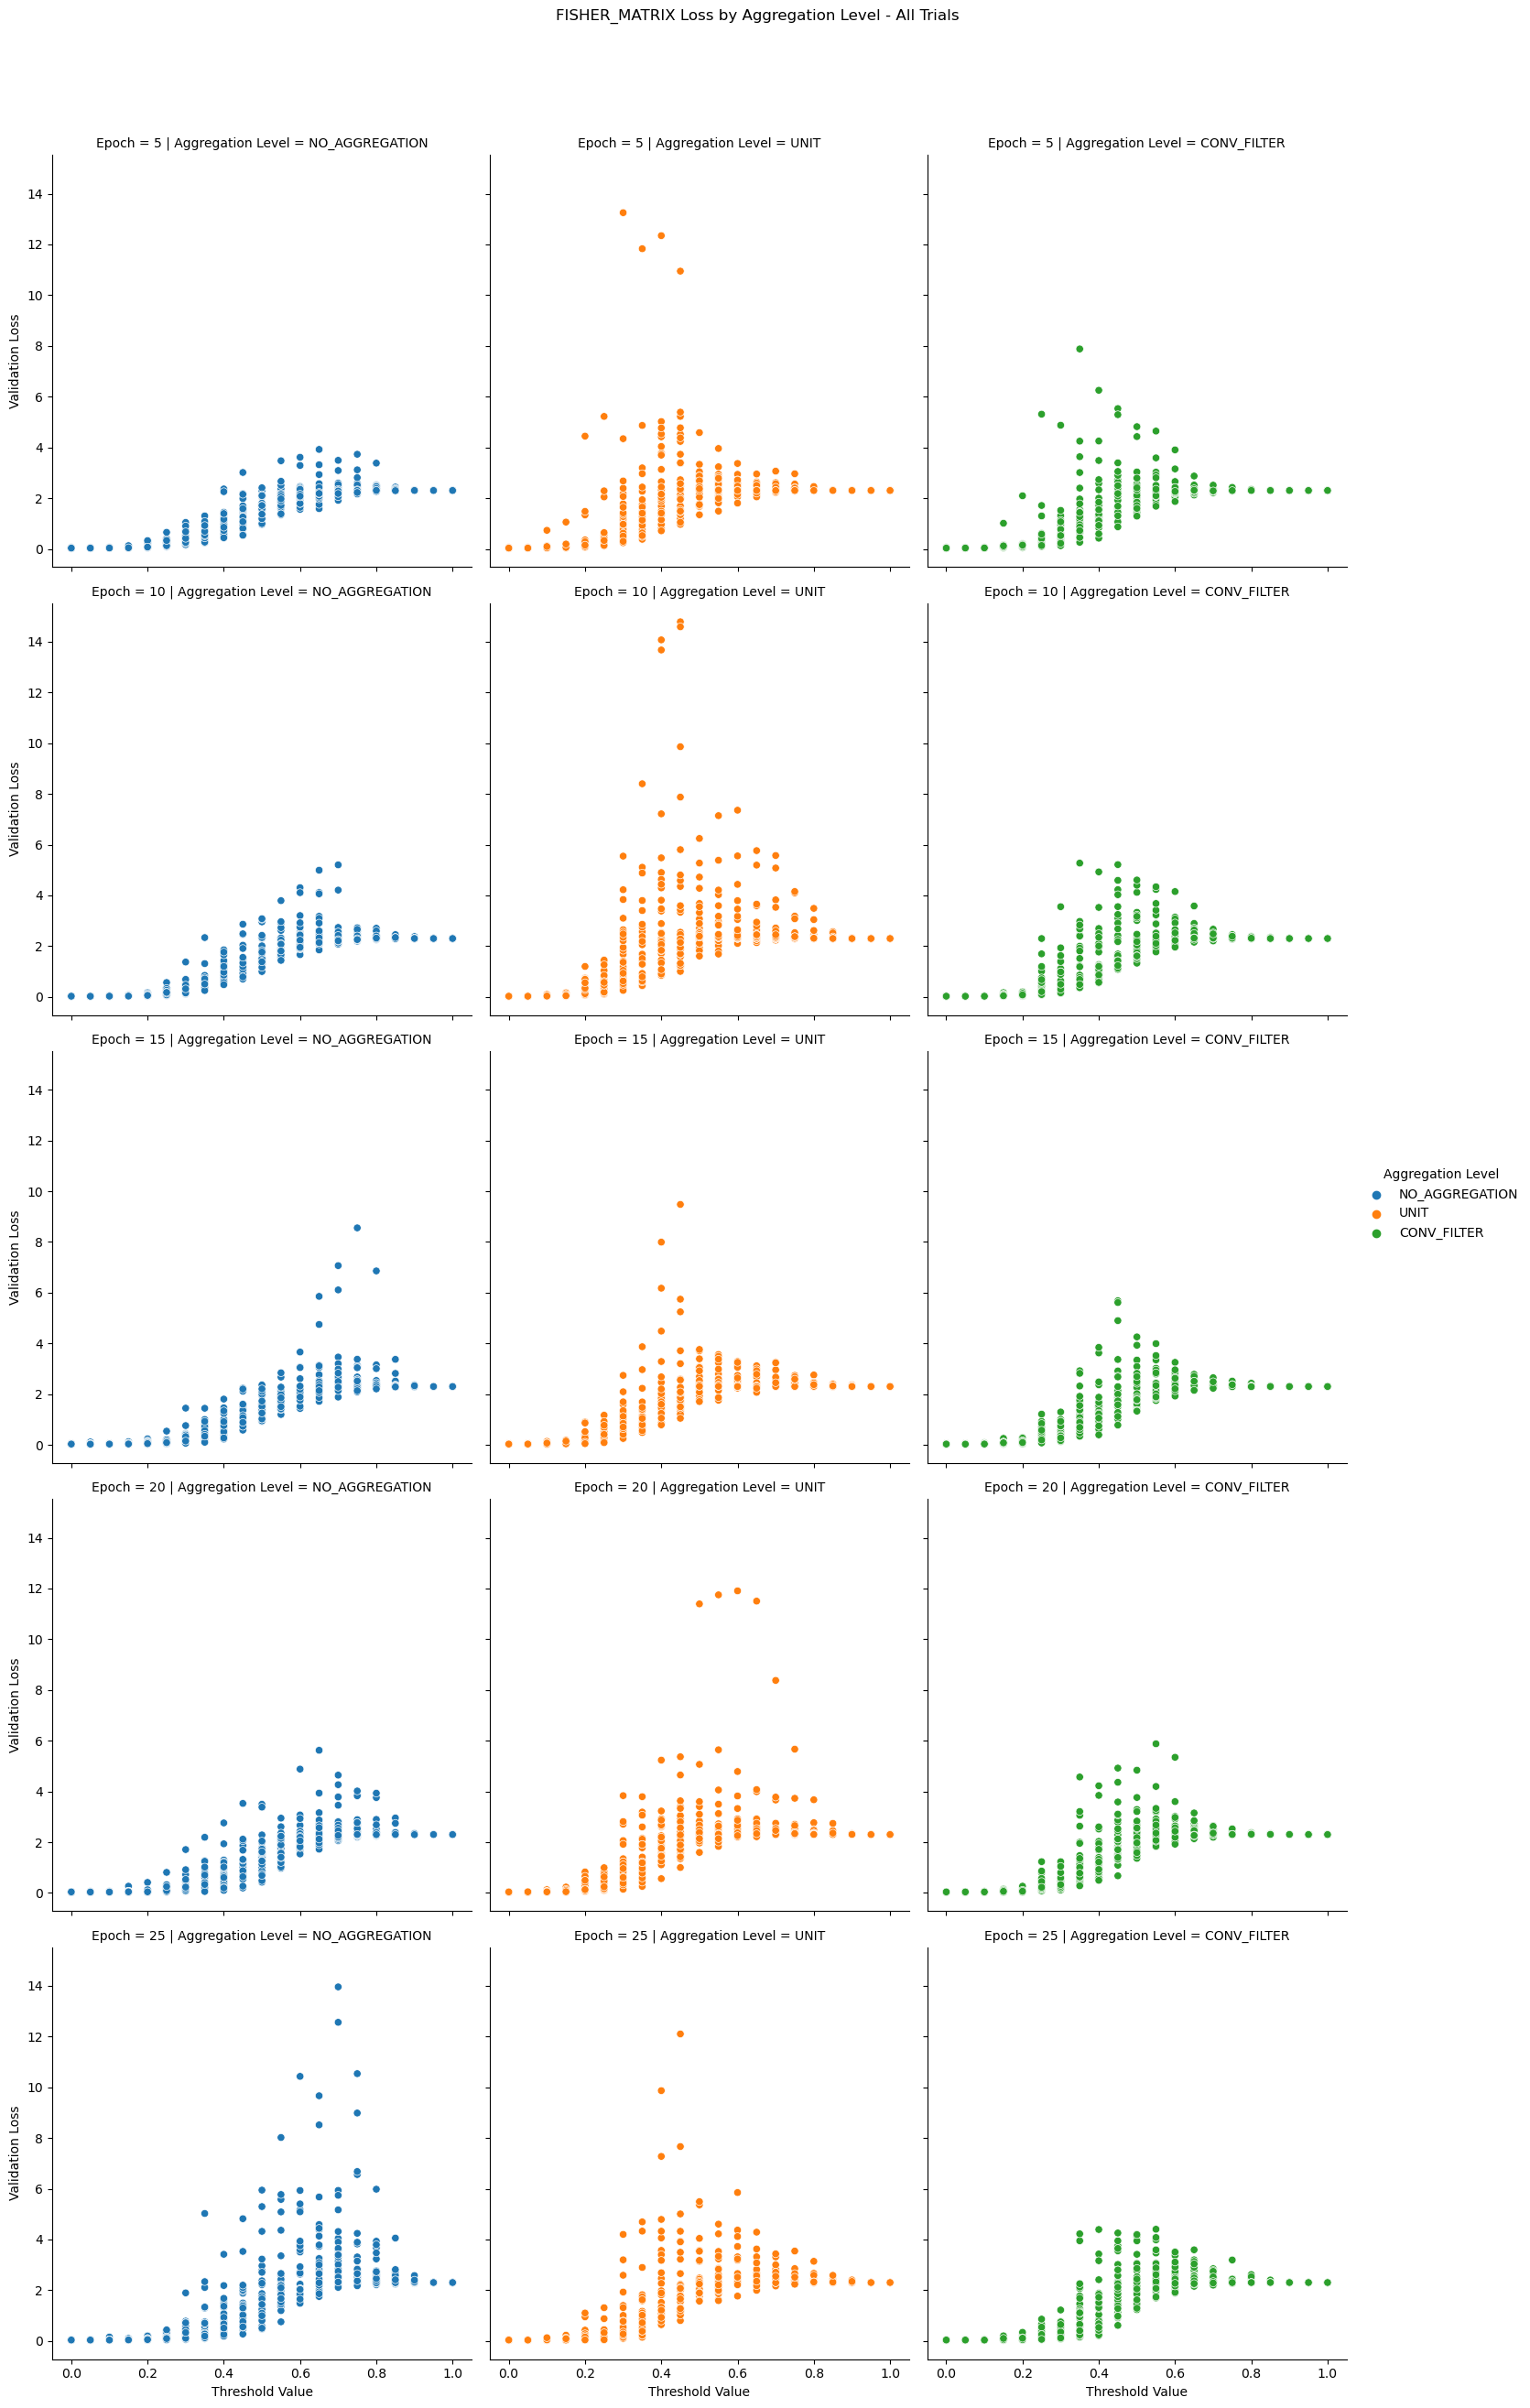

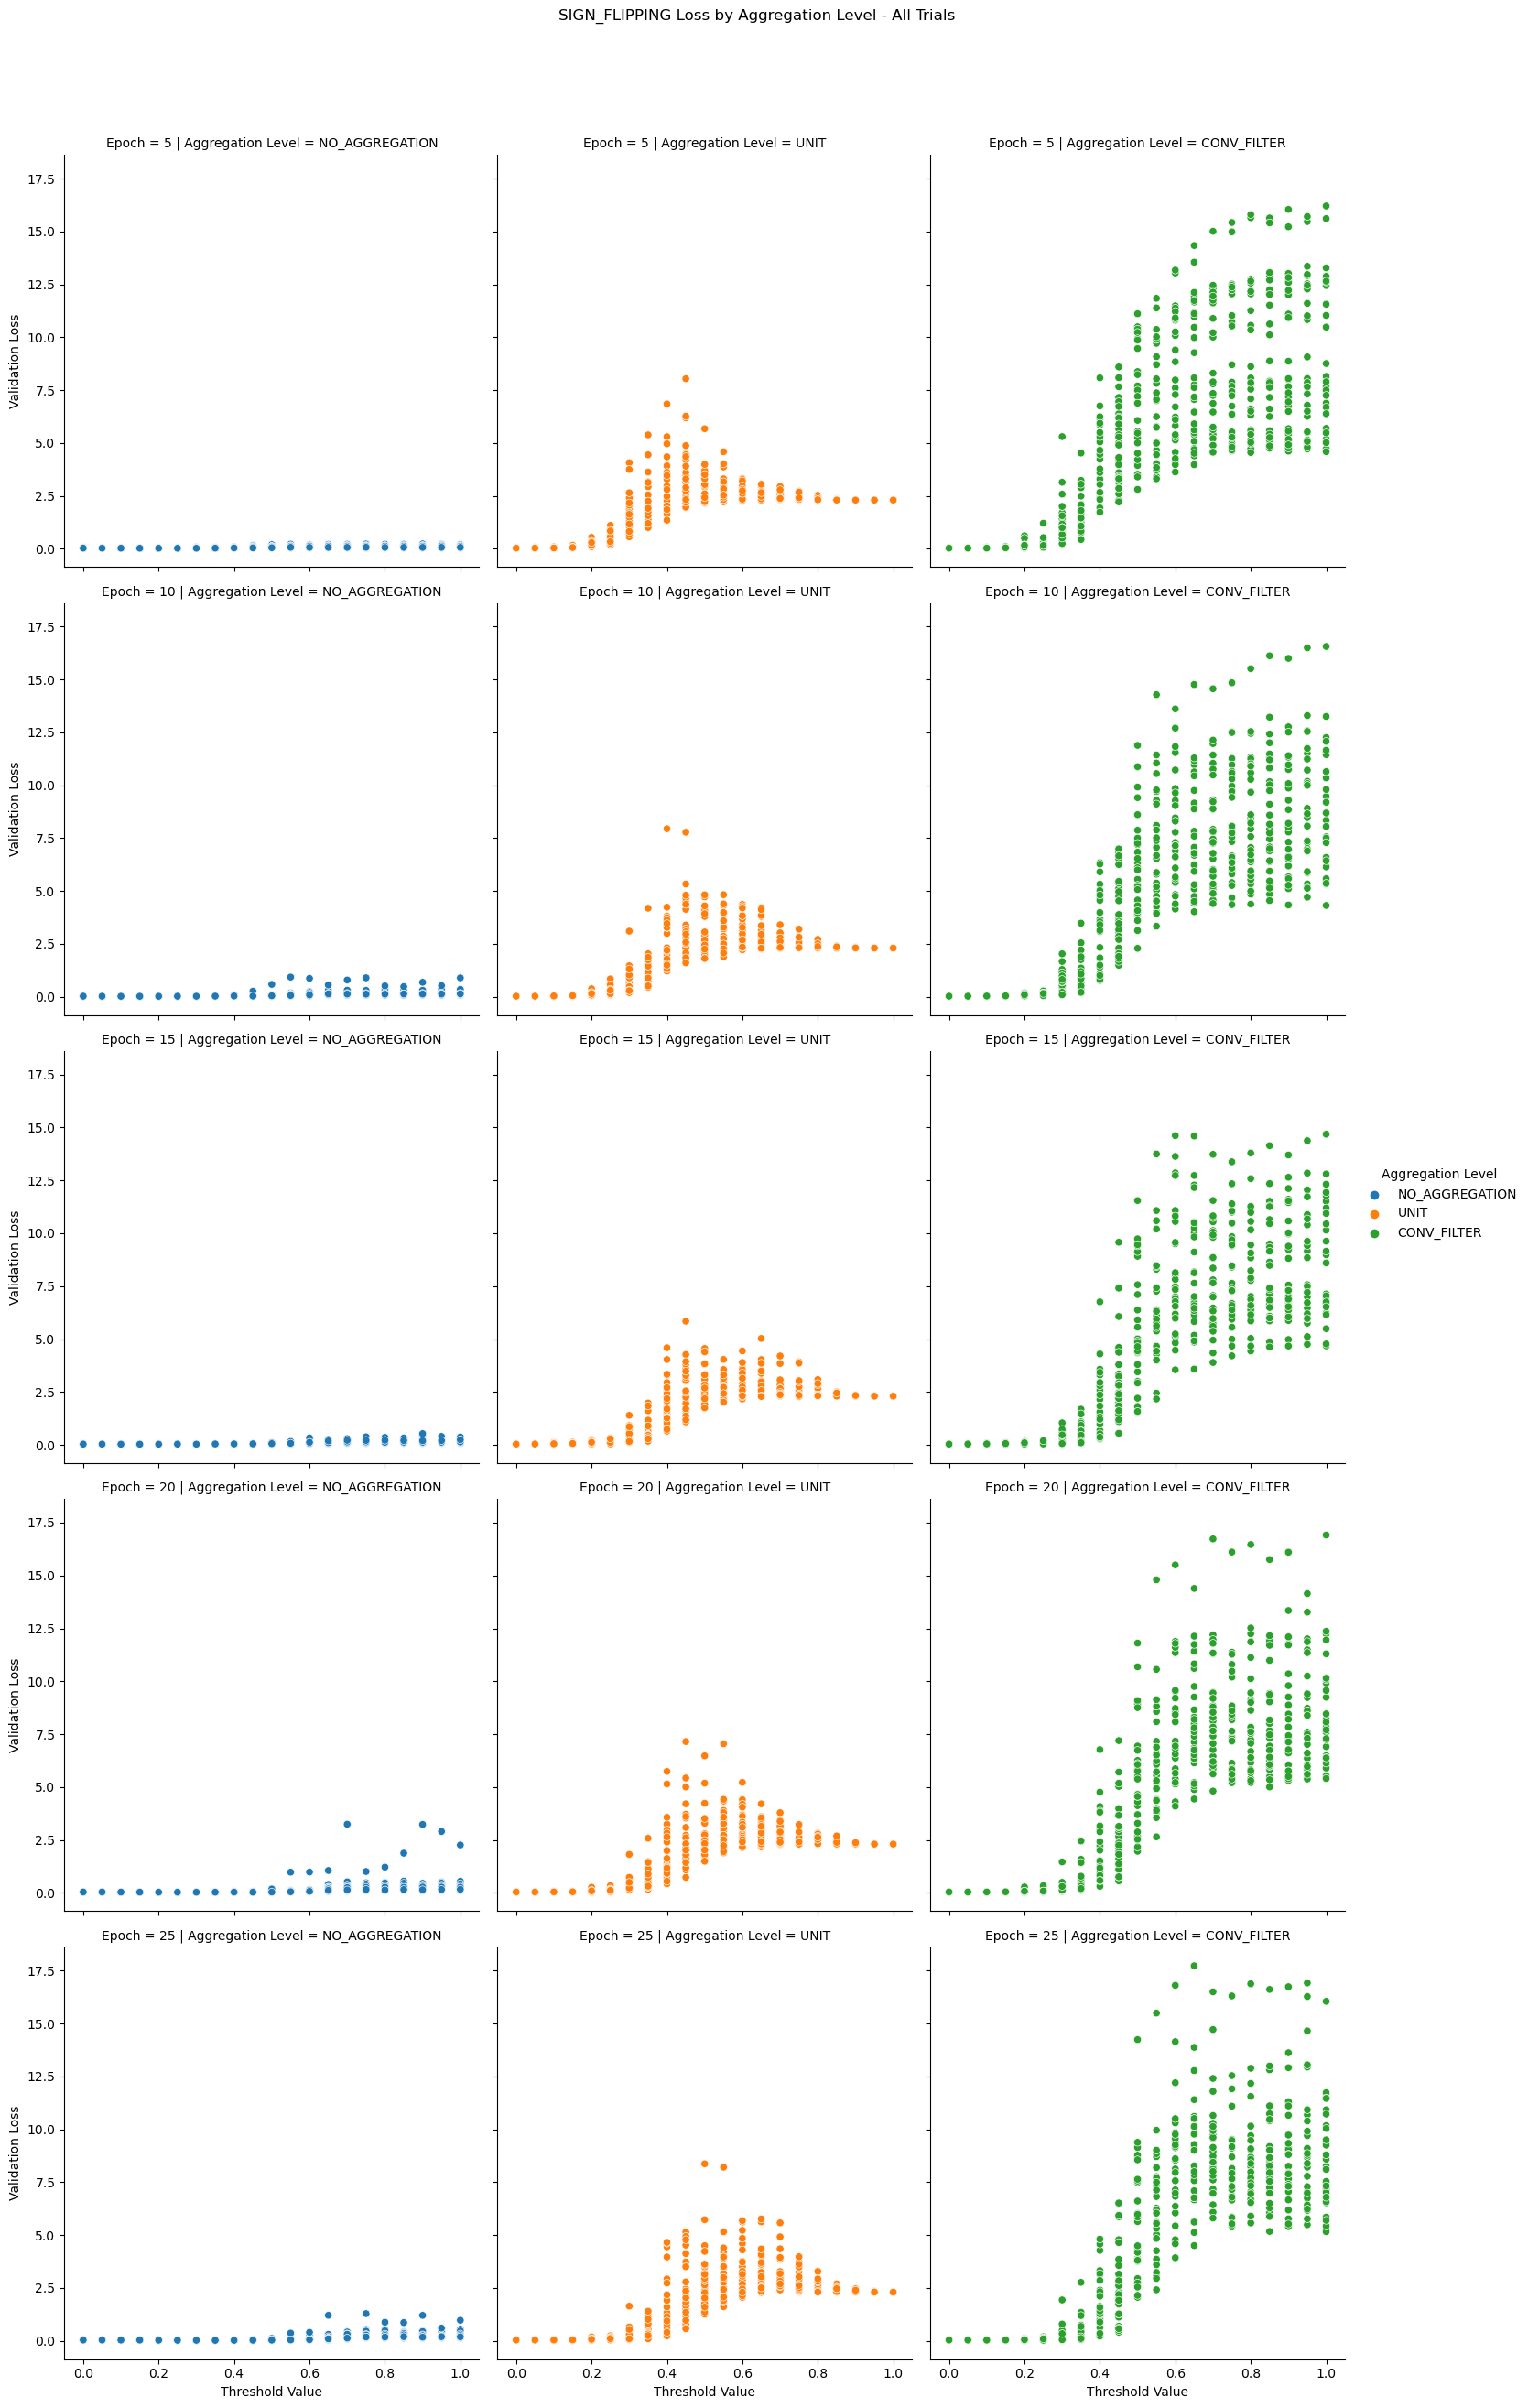

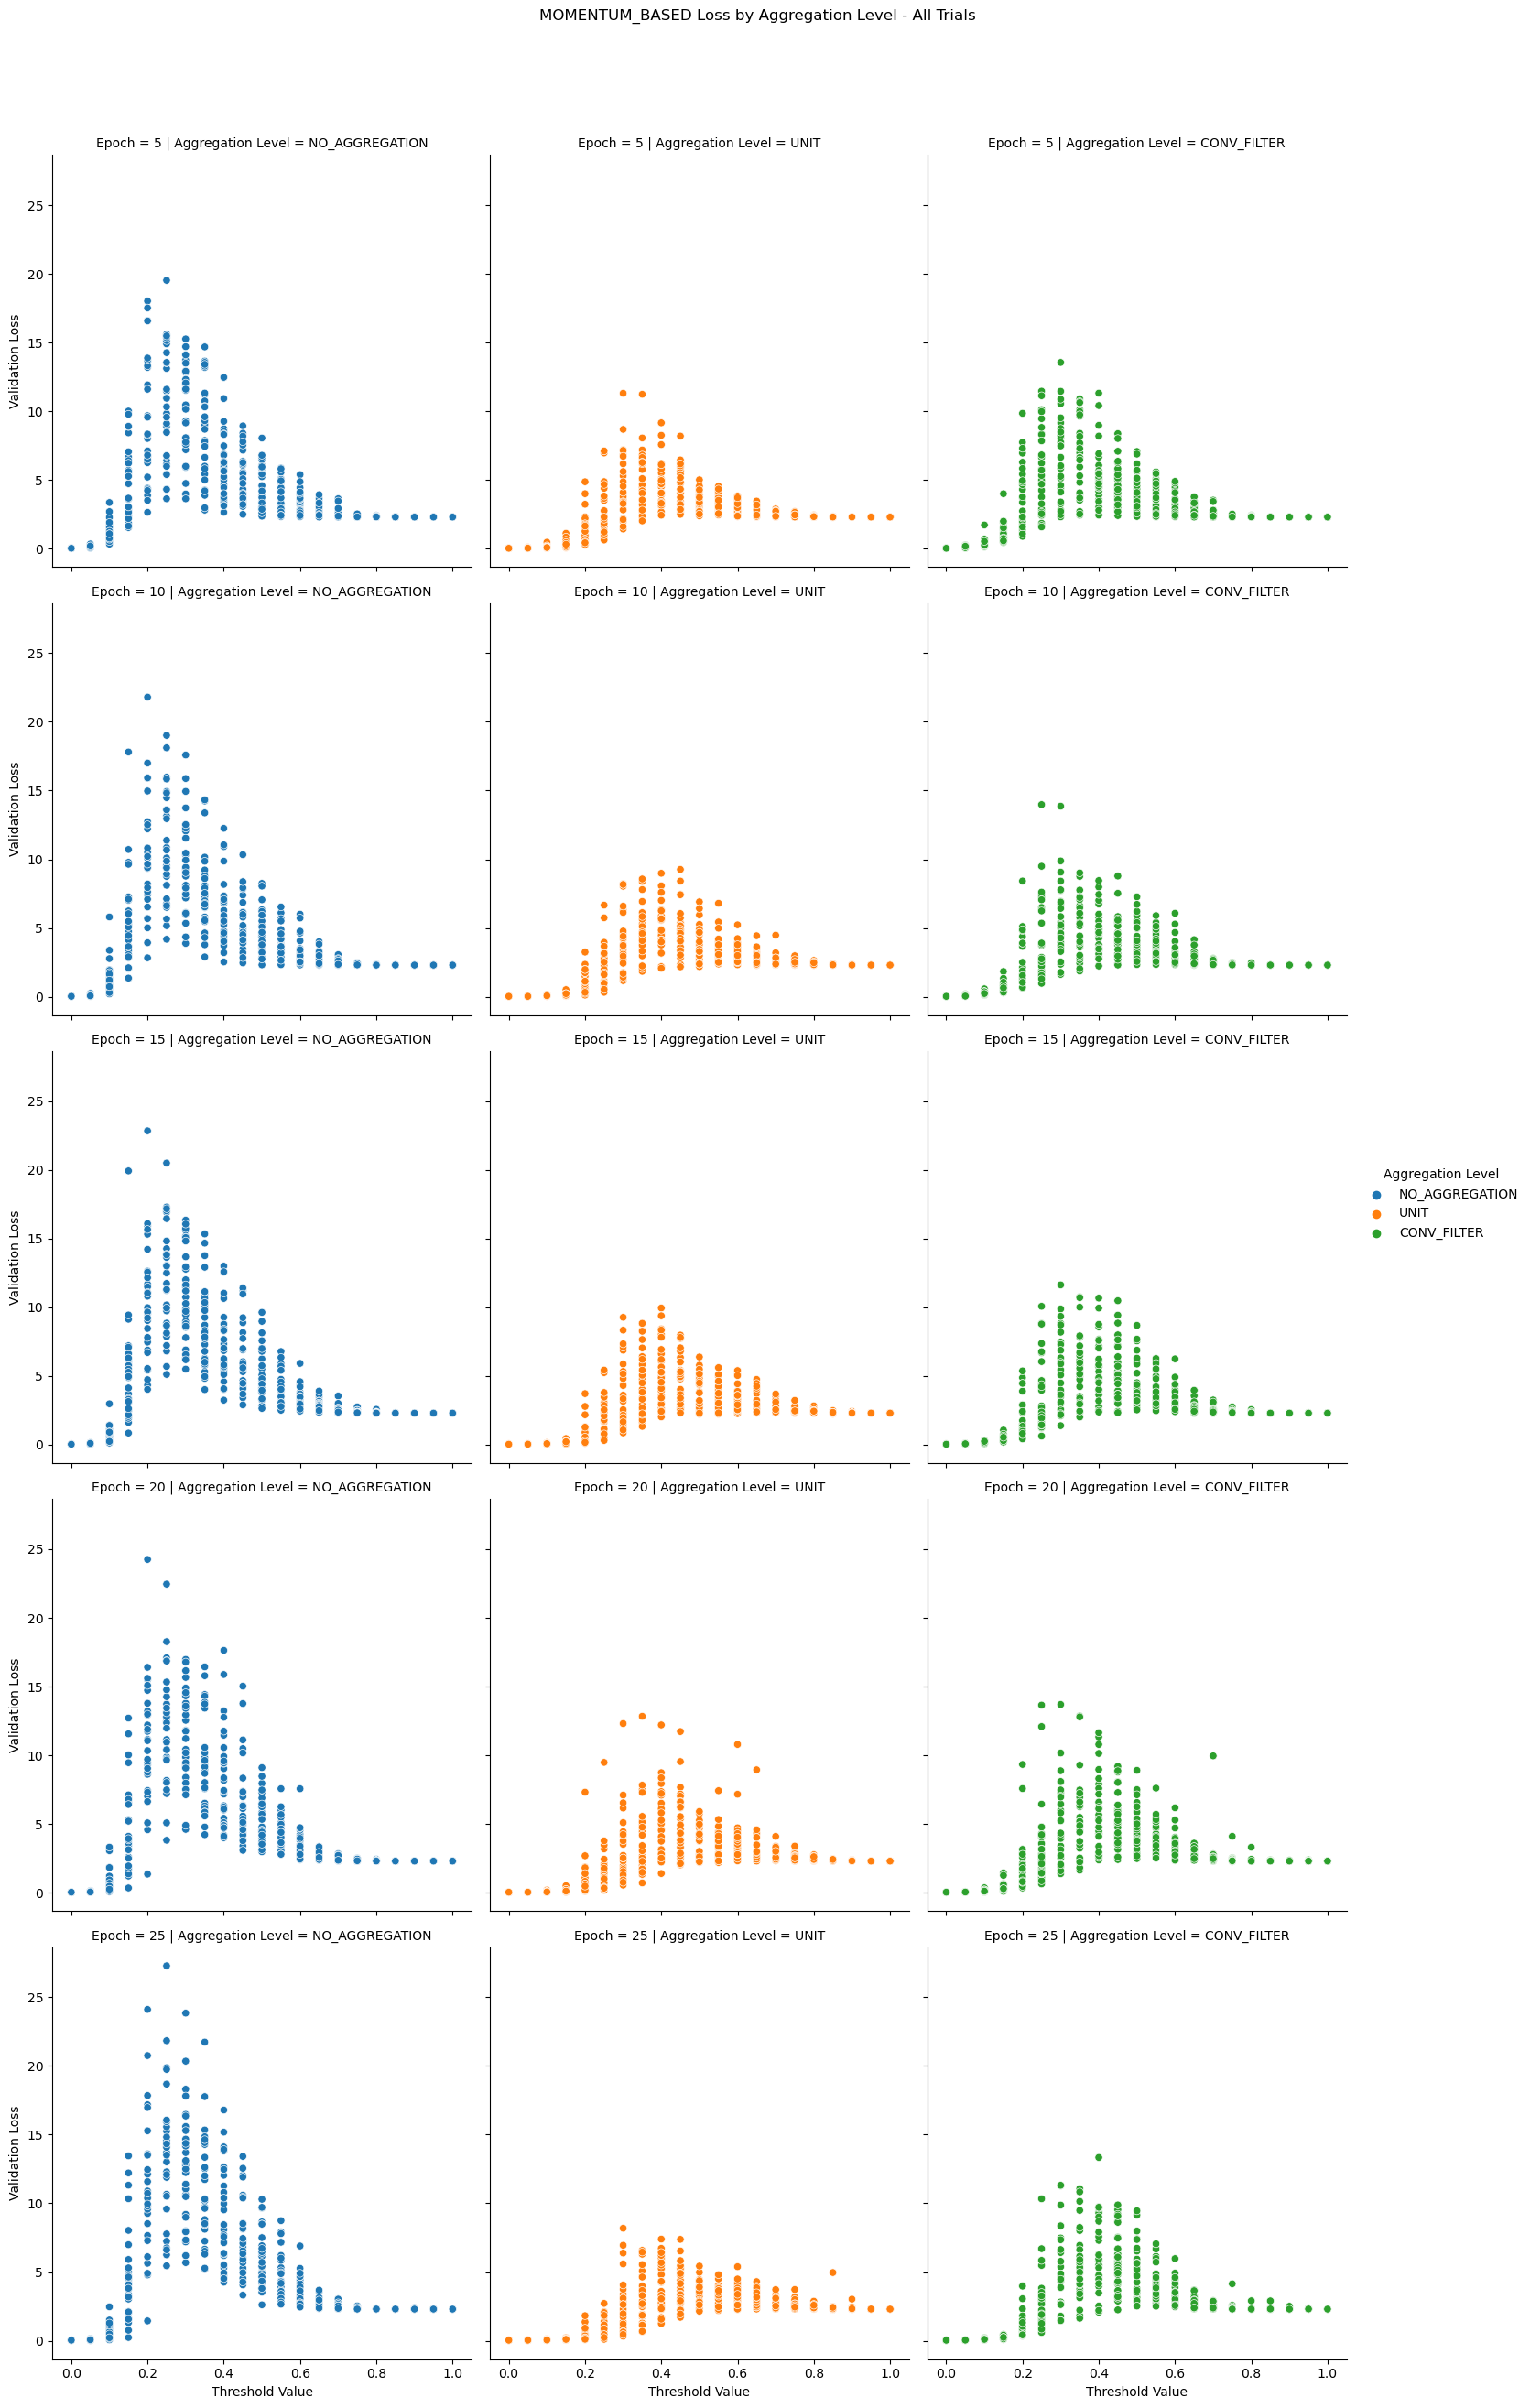

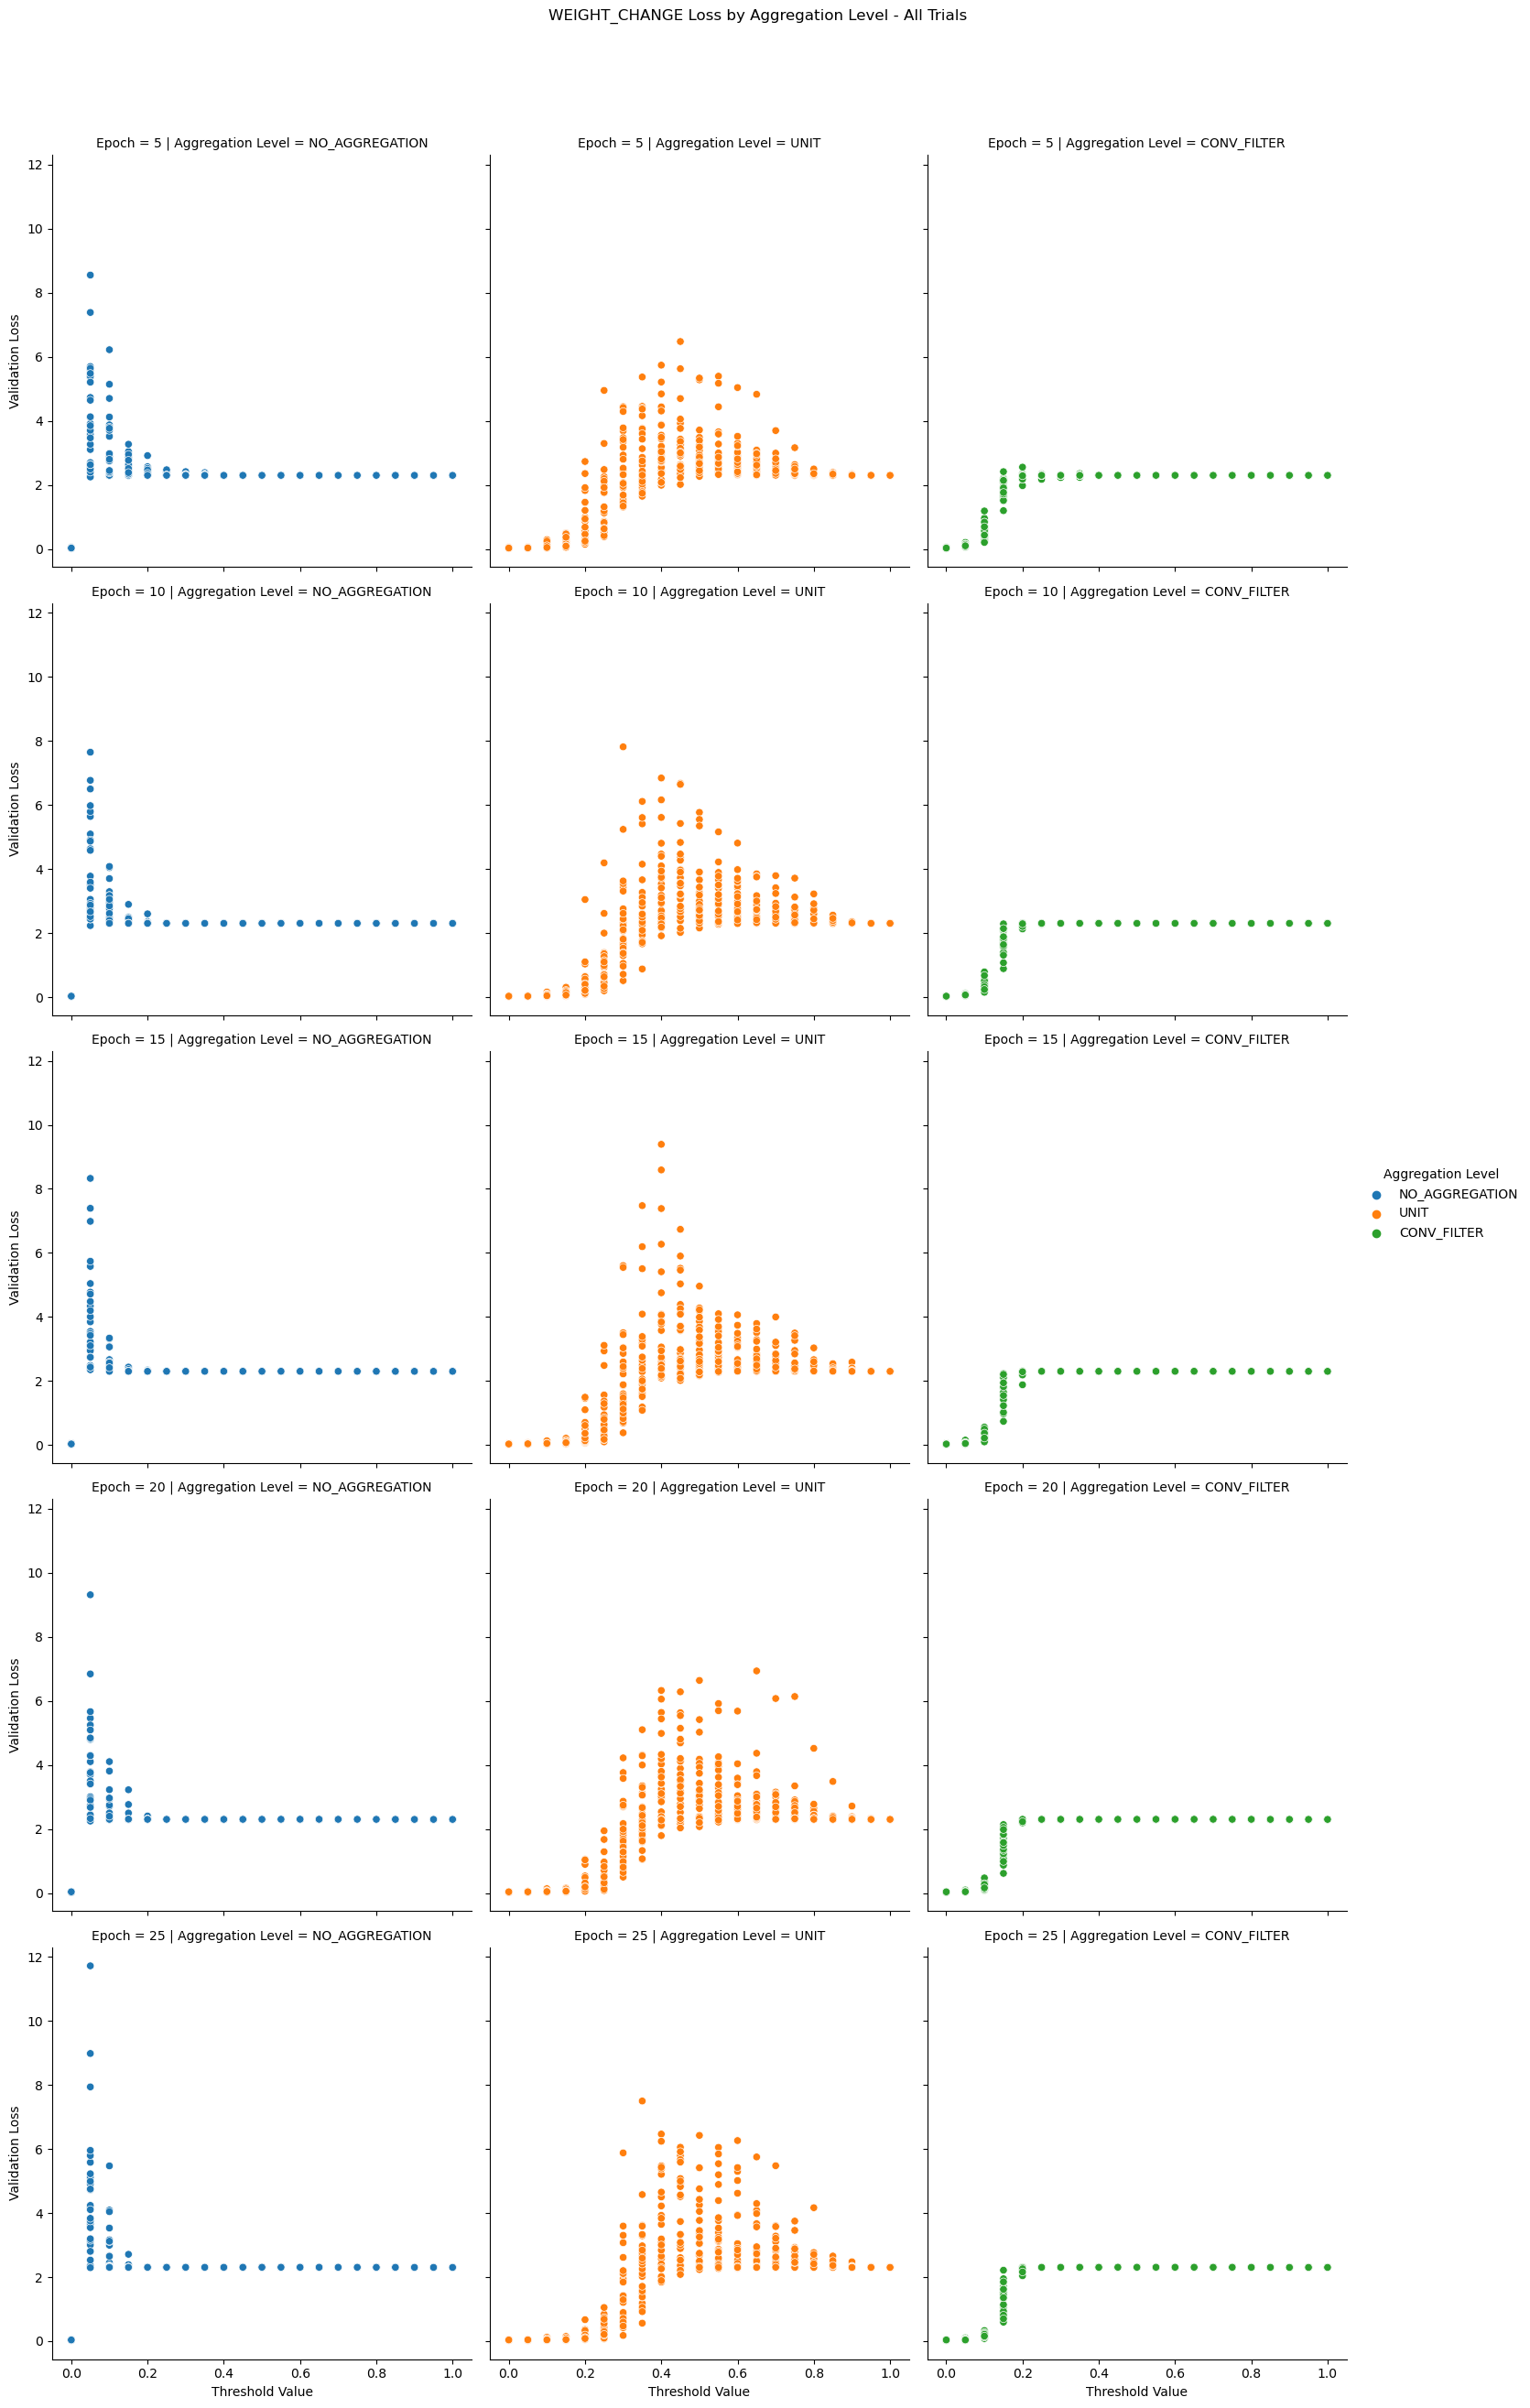

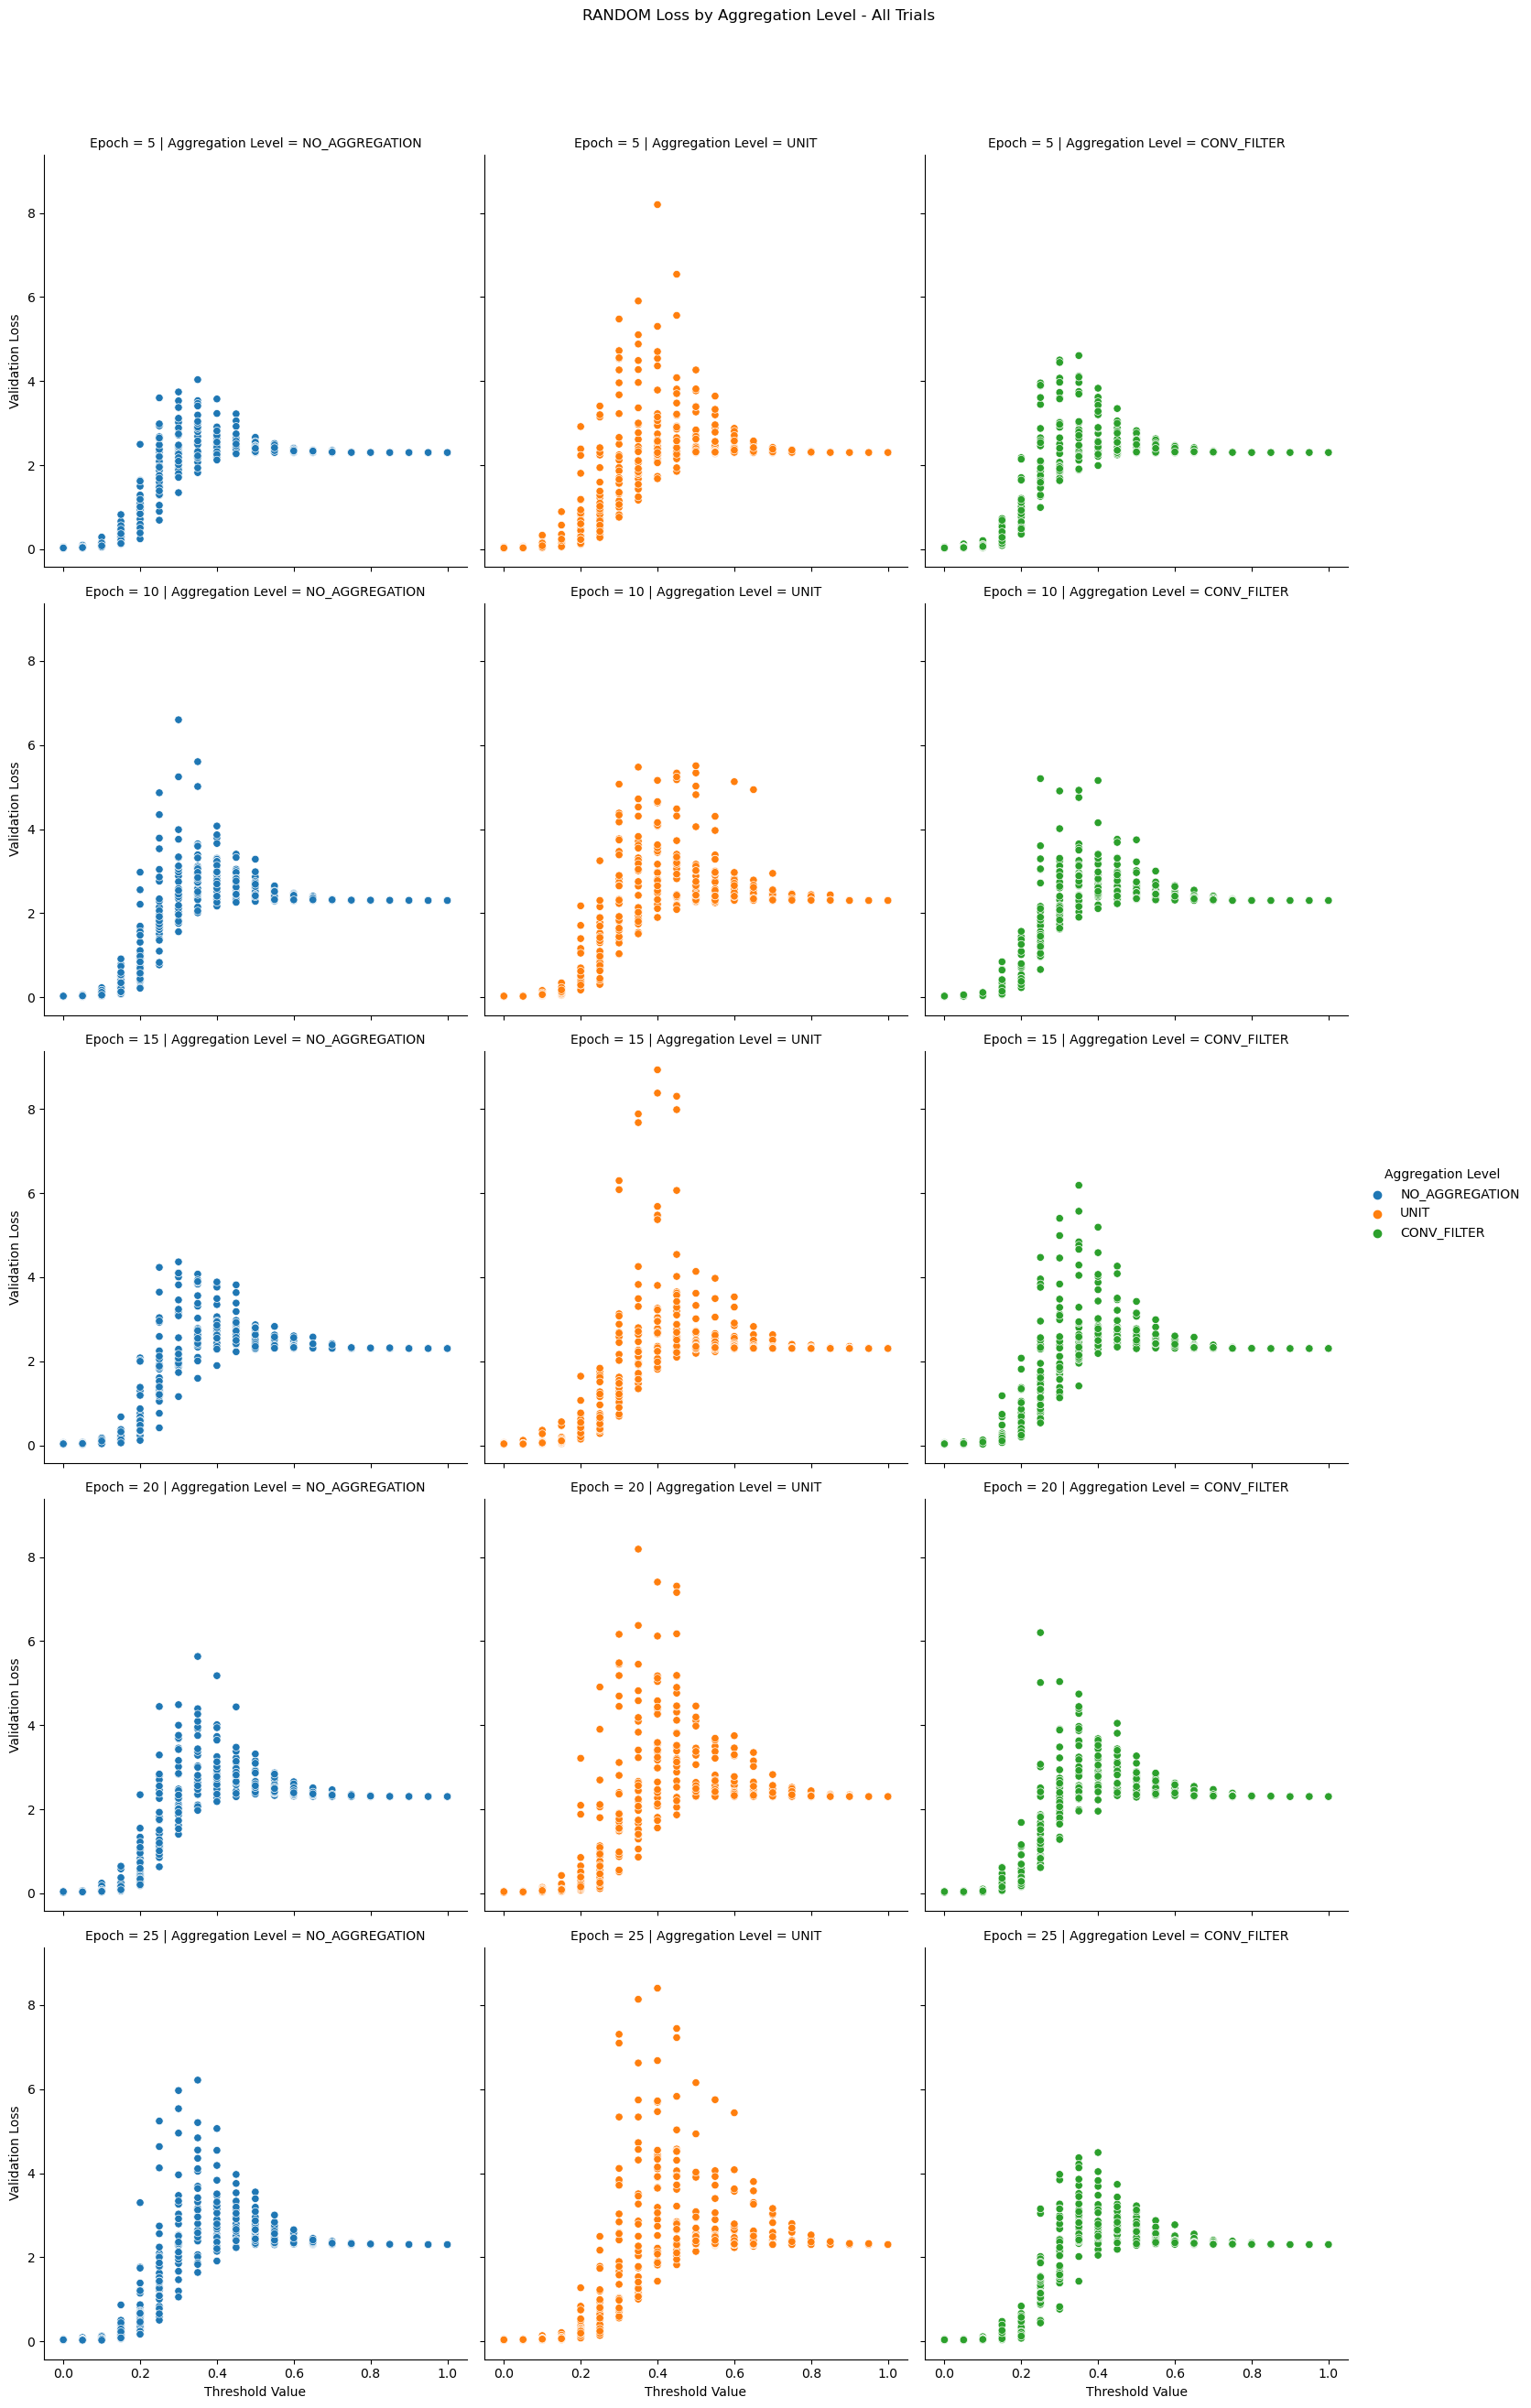

In [4]:
methods = list(all_data["EWC Method"].unique())
for method in methods:
    target_data = all_data.loc[all_data["EWC Method"] == method]
    f = sns.relplot(data=target_data, x="Threshold Value", y="Validation Loss", col="Aggregation Level", row="Epoch", hue="Aggregation Level", )
    f.fig.suptitle(f"{method} Loss by Aggregation Level - All Trials", y=1.05)

In [27]:
grouped_data = all_data.groupby(["Epoch","EWC Method","Aggregation Level","Threshold Value"])
grouped_data = grouped_data.agg([np.mean, np.std]).reset_index()
grouped_data.columns = [" ".join(col).strip().title() for col in grouped_data.columns.values]
grouped_data["Loss Std"] /= NUM_SAMPLES
grouped_data["Validation Loss Std"] /= NUM_SAMPLES
grouped_data = grouped_data.rename(columns={"Loss Std": "Loss Err", "Validation Loss Std": "Validation Loss Err"})
display(grouped_data)

,Epoch,Ewc Method,Aggregation Level,Threshold Value,Loss Mean,Loss Err,Validation Loss Mean,Validation Loss Err
0,5,FISHER_MATRIX,CONV_FILTER,0.00,0.020821,0.000202,0.032779,0.000268
1,5,FISHER_MATRIX,CONV_FILTER,0.05,0.021673,0.000181,0.032949,0.000233
2,5,FISHER_MATRIX,CONV_FILTER,0.10,0.027803,0.000246,0.037857,0.000272
3,5,FISHER_MATRIX,CONV_FILTER,0.15,0.102597,0.005997,0.109711,0.005743
4,5,FISHER_MATRIX,CONV_FILTER,0.20,0.187717,0.012507,0.191533,0.012078
...,...,...,...,...,...,...,...,...
1570,25,WEIGHT_CHANGE,UNIT,0.80,2.454735,0.011780,2.452886,0.011639
1571,25,WEIGHT_CHANGE,UNIT,0.85,2.354997,0.002851,2.354336,0.002801
1572,25,WEIGHT_CHANGE,UNIT,0.90,2.317778,0.001167,2.317633,0.001148
1573,25,WEIGHT_CHANGE,UNIT,0.95,2.305949,0.000170,2.305914,0.000168


In [28]:
grouped_data.to_csv(os.path.join(DATA_FOLDER, "AggregatedData.csv"))